In [2]:
from models import *
from utils.arguments.train_arguments import *
from utils.data import *
from utils.logging_functions import *
from utils.kaggle import *
from utils.onecyclelr import OneCycleLR
from utils.radam import *
import matplotlib.pyplot as plt

train_df, valid_df = train_test_split(df, test_size=0.15, shuffle=True, random_state=2019)

TASK_NAME = ['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']
NUM_TASK = len(TASK_NAME)

In [3]:
train_augment, valid_augment = data_augmentation_selector("da7", 150, 128)

In [4]:
train_dataset = BengaliDataset(df=train_df, data_path=data_root, augment=train_augment)

In [5]:
train_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=32,
                          drop_last=True, num_workers=4, pin_memory=True, collate_fn=null_collate)

In [7]:
x, y, infor = next(iter(train_loader))

In [37]:
print("Shape: {}".format(x.shape))
print("Max: {}".format(x.max()))
print("Min: {}".format(x.min()))
print("Mean: {}".format(x.mean()))

Shape: torch.Size([32, 3, 128, 128])
Max: 1.0
Min: 0.0
Mean: 0.8066890239715576


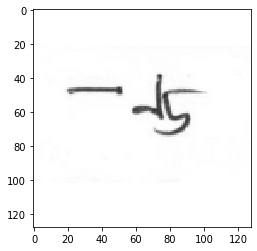

In [38]:
plt.imshow(x.data.cpu().numpy()[0].transpose(1,2,0))

In [18]:
x[0]

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

------------------------------------------------------------------------

In [21]:
train_dataset.image_ids[0]

'Train_180549'

In [22]:
train_dataset.data_path

'/home/maparla/DeepLearning/Datasets/bengali/bengaliai/256_train/256/'

In [23]:
image_id = os.path.join(train_dataset.data_path, train_dataset.image_ids[0] + '.png')

In [29]:
image = cv2.imread(image_id, 0)

In [30]:
image

array([[255, 255, 255, 255, ..., 255, 255, 255, 255],
       [255, 255, 255, 255, ..., 255, 255, 255, 255],
       [255, 255, 255, 255, ..., 255, 255, 255, 255],
       [255, 255, 255, 255, ..., 255, 255, 255, 255],
       ...,
       [255, 255, 255, 255, ..., 255, 255, 255, 255],
       [255, 255, 255, 255, ..., 255, 255, 255, 255],
       [255, 255, 255, 255, ..., 255, 255, 255, 255],
       [255, 255, 255, 255, ..., 255, 255, 255, 255]], dtype=uint8)

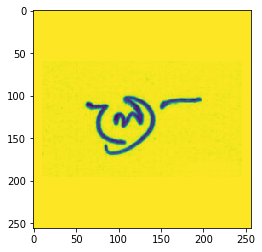

In [32]:
plt.imshow(image)

In [33]:
image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

In [34]:
image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 

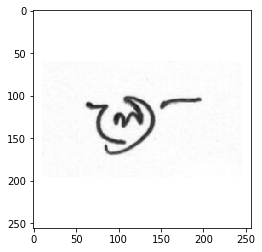

In [35]:
plt.imshow(image)